In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
df=sns.load_dataset("iris")

In [26]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [27]:
x=df.iloc[:,:-1]

In [28]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
lable=LabelEncoder()

In [32]:
y=lable.fit_transform(df[['species']])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=40)

In [43]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [44]:
treeclassifier=DecisionTreeClassifier()

In [45]:
treeclassifier.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(0.4, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.666\nsamples = 105\nvalue = [34, 36, 35]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.5, 0.75, 'x[2] <= 4.95\ngini = 0.5\nsamples = 71\nvalue = [0, 36, 35]'),
 Text(0.2, 0.5833333333333334, 'x[3] <= 1.65\ngini = 0.149\nsamples = 37\nvalue = [0, 34, 3]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(0.3, 0.4166666666666667, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5833333333333334, 'x[3] <= 1.75\ngini = 0.111\nsamples = 34\nvalue = [0, 2, 32]'),
 Text(0.7, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.6, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.25, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.7, 0.0833333333

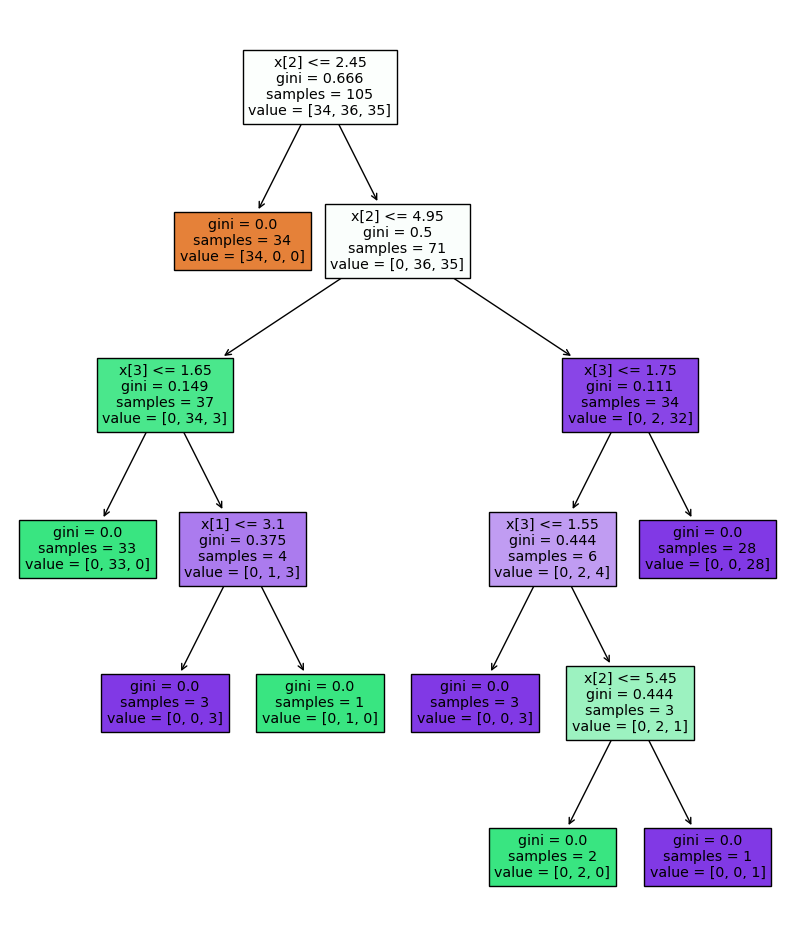

In [46]:
plt.figure(figsize=(10,12))
tree.plot_tree(treeclassifier,filled=True)

In [47]:
# prediction
y_pred=treeclassifier.predict(x_test)

In [48]:
y_pred

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 2,
       2])

In [49]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [50]:
score=accuracy_score(y_pred,y_test)

In [51]:
cla=classification_report(y_pred,y_test)

In [52]:
score

1.0

In [53]:
cla

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        16\n           1       1.00      1.00      1.00        14\n           2       1.00      1.00      1.00        15\n\n    accuracy                           1.00        45\n   macro avg       1.00      1.00      1.00        45\nweighted avg       1.00      1.00      1.00        45\n'

In [55]:
# the model is overfinig so use the post pruning withmax_depth =2

In [62]:
treeclassifier=DecisionTreeClassifier(criterion='entropy',max_depth=2)

In [63]:
treeclassifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\nentropy = 1.585\nsamples = 105\nvalue = [34, 36, 35]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.6, 0.5, 'x[2] <= 4.95\nentropy = 1.0\nsamples = 71\nvalue = [0, 36, 35]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.406\nsamples = 37\nvalue = [0, 34, 3]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.323\nsamples = 34\nvalue = [0, 2, 32]')]

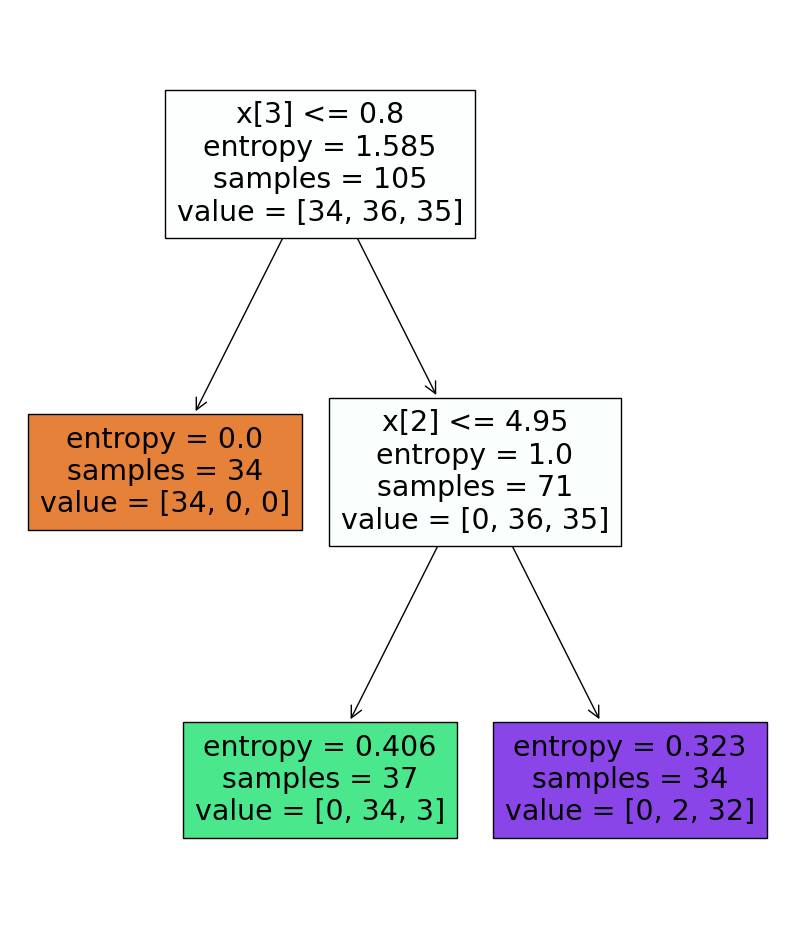

In [64]:
plt.figure(figsize=(10,12))
tree.plot_tree(treeclassifier,filled=True)

In [65]:
y_pred=treeclassifier.predict(x_test)

In [66]:
y_pred

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 1, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 1, 2,
       2])

In [67]:
score=accuracy_score(y_pred,y_test)
cla=classification_report(y_pred,y_test)
print(score)
print(cla)

0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.82      0.90        17
           2       0.80      1.00      0.89        12

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.95      0.93      0.93        45

